Step 1: Loading the dataset and perform EDA

1. Loading the dataset

In [1]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", 
                "exang", "oldpeak", "slope", "ca", "thal", "target"]
data = pd.read_csv(url, names=column_names)
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


2. Exploratory Data analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


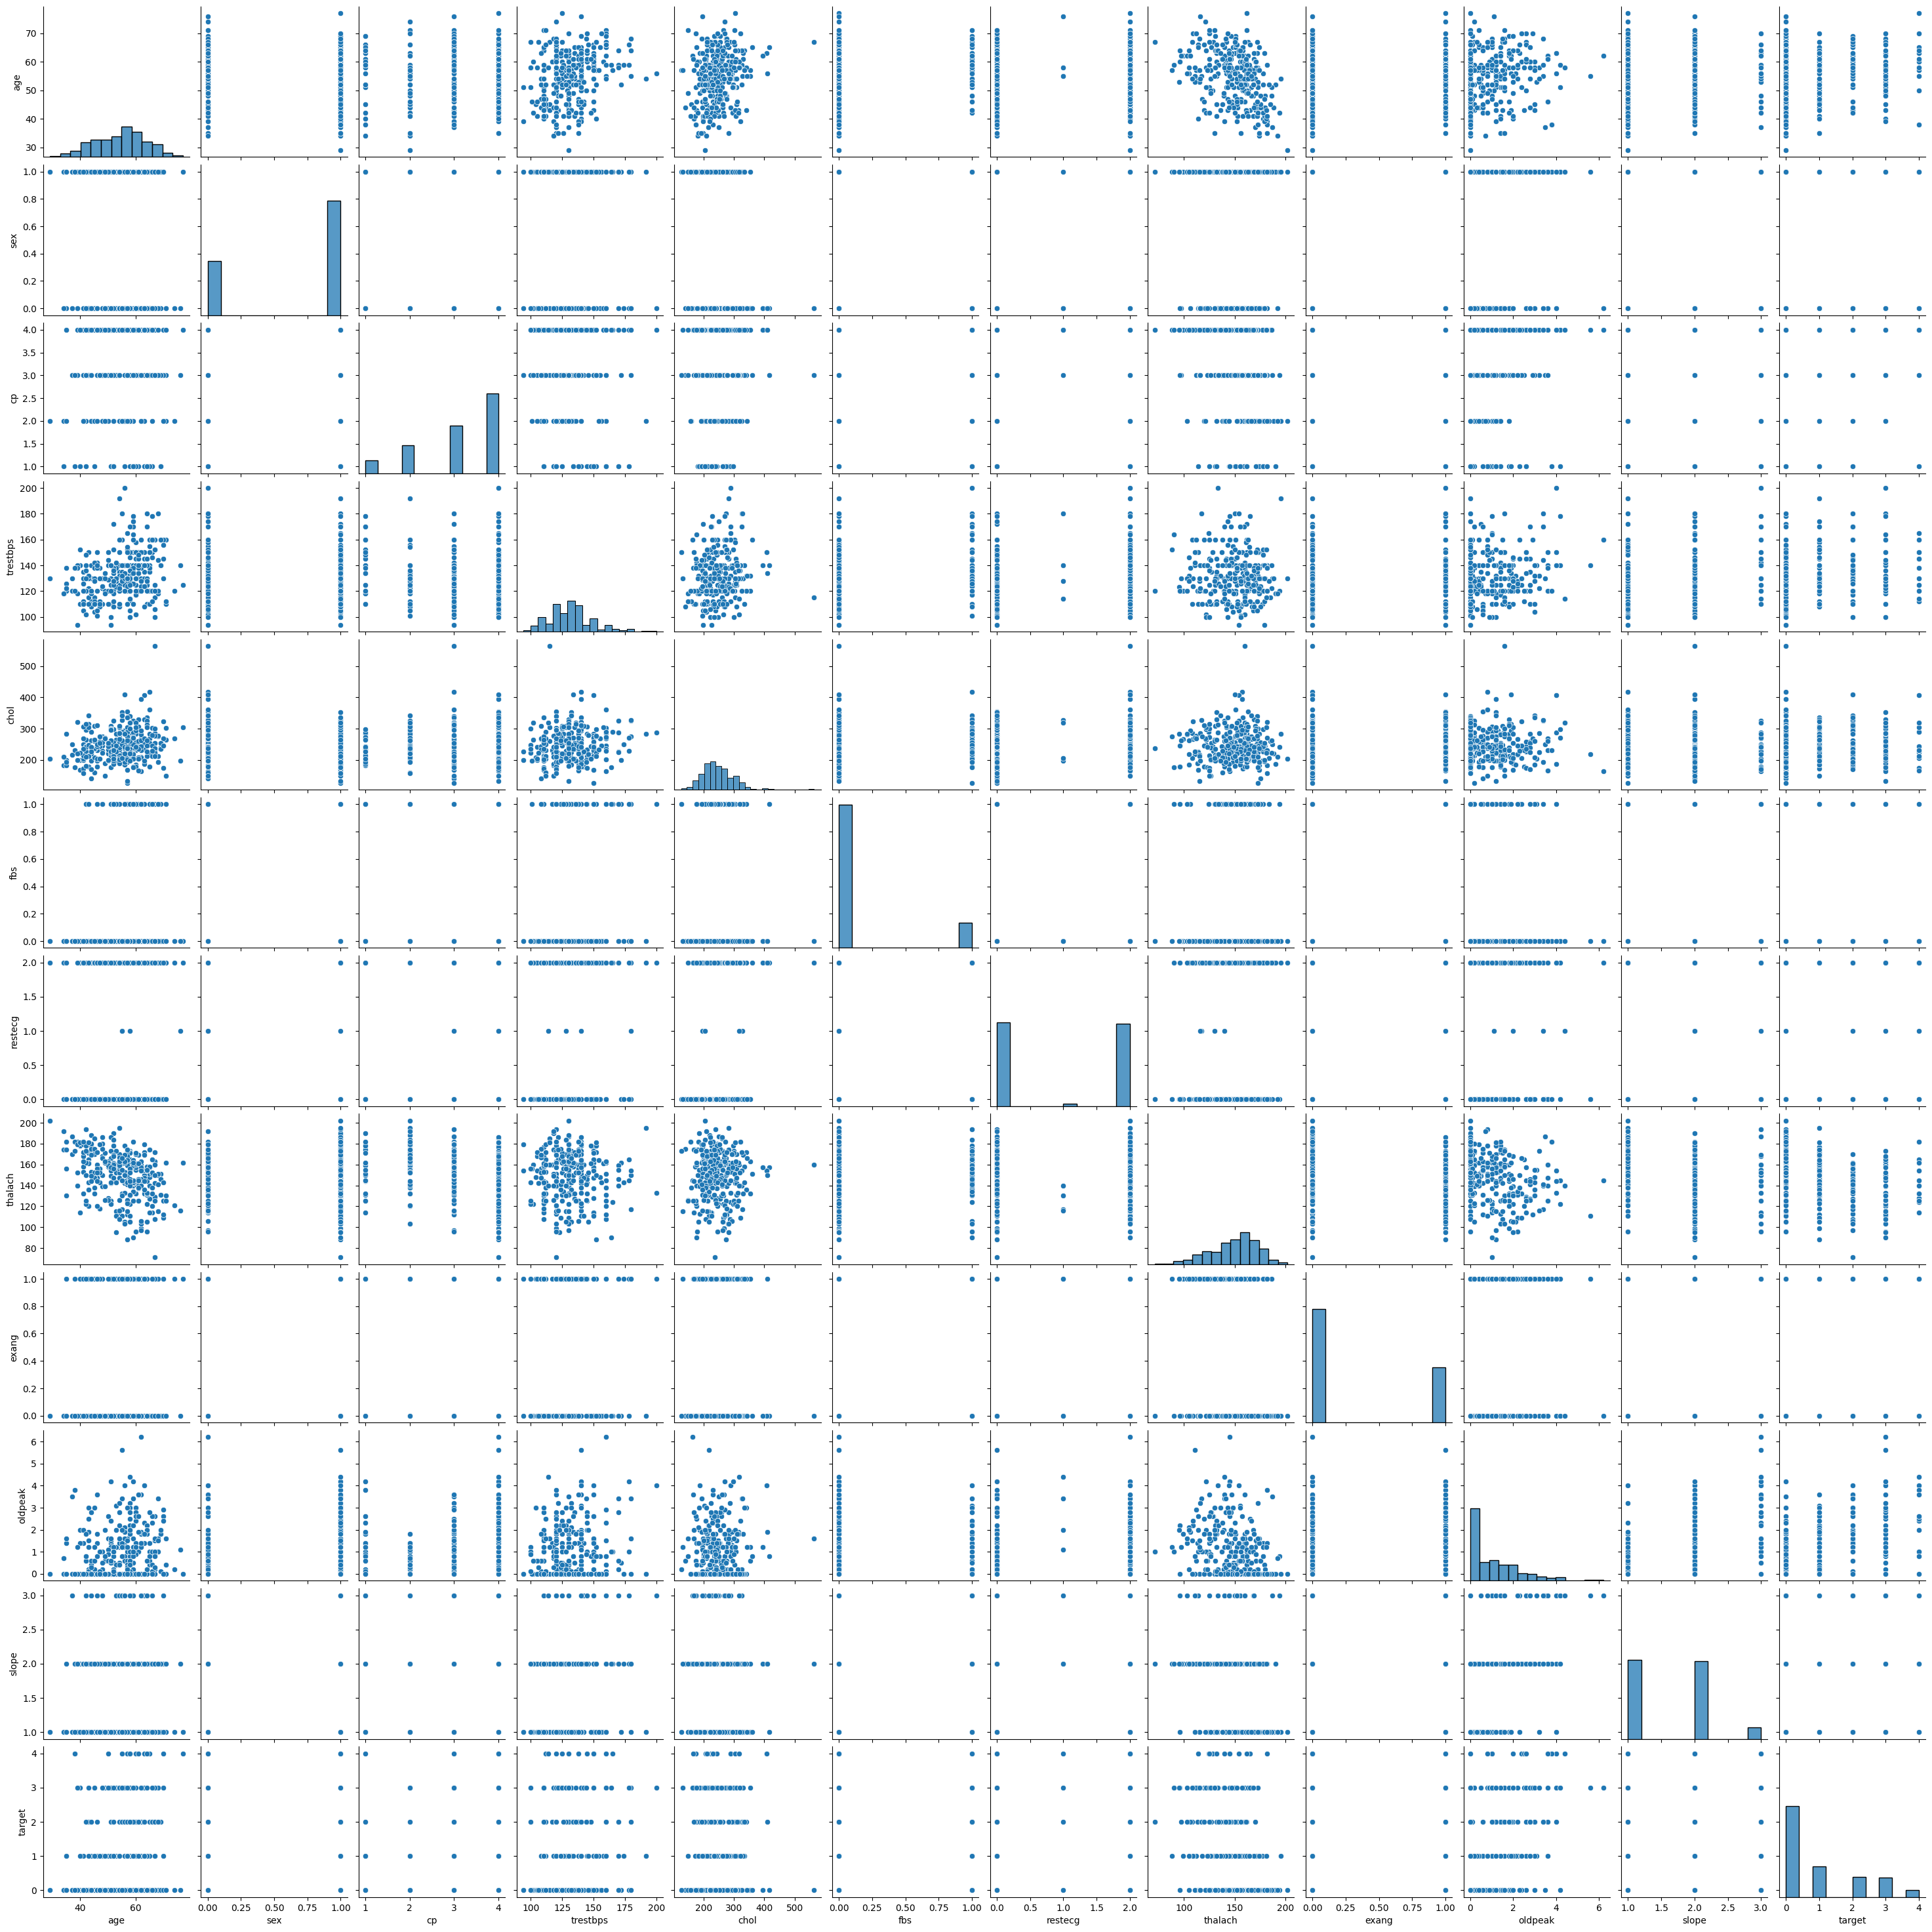

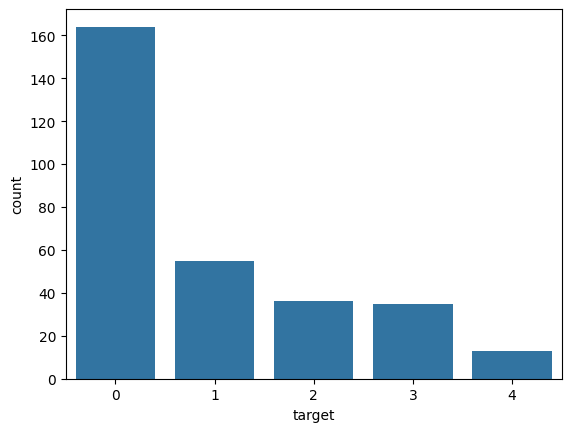

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

data.describe()
data.info()
sns.pairplot(data)
plt.show()

# Checking the distribution of the target variable
sns.countplot(x='target', data=data)
plt.show()

Step 2: Preprocess the dataset

1. Handling missing values

In [3]:
data.replace('?', pd.NA, inplace=True)
data.dropna(inplace=True)

2. Scaling the features

In [4]:
from sklearn.preprocessing import StandardScaler

features = data.drop(columns=['target'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

3. Encoding categorical variables

In [5]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['cp', 'restecg', 'slope', 'ca', 'thal']
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(data[categorical_features]).toarray()

import numpy as np
processed_data = np.hstack((scaled_features, encoded_features))

Step 3: Apply clustering algorithms

1. K-means clustering

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(processed_data)

2. Hierarchical clustering

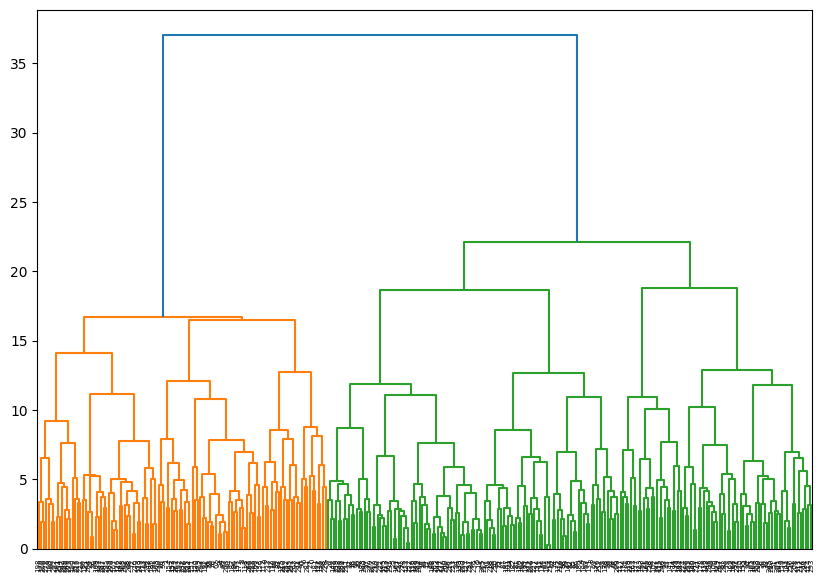

In [7]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

Z = linkage(processed_data, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.show()

hierarchical_labels = fcluster(Z, t=3, criterion='maxclust')

3. DBSCAN clustering

In [8]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(processed_data)

Step 4: Visualize the clusters

1. PCA

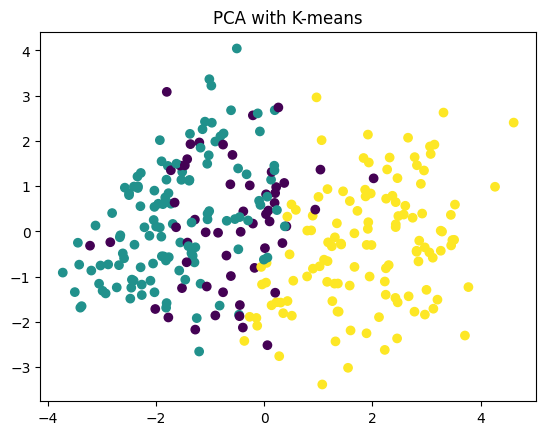

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(processed_data)

plt.scatter(pca_components[:, 0], pca_components[:, 1], c=kmeans_labels)
plt.title('PCA with K-means')
plt.show()

2. t-SNE

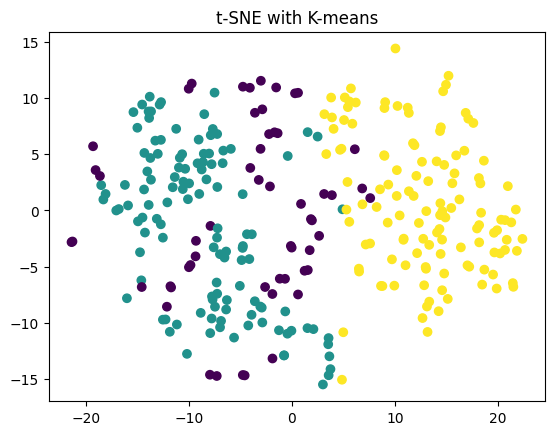

In [10]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(processed_data)

plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=kmeans_labels)
plt.title('t-SNE with K-means')
plt.show()

Step 5: Apply Gaussian Mixture Models (GMMs)

1. GMMs

In [11]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(processed_data)

Step 6: Evaluate clustering performance

1. Silhouette score and Davies-Bouldin index

In [13]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

def evaluate_clustering(labels, data):
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Number of clusters ignoring noise if present
    if n_clusters < 2:
        return {"Silhouette Score": None, "Davies-Bouldin Index": None}
    silhouette = silhouette_score(data, labels)
    davies_bouldin = davies_bouldin_score(data, labels)
    return {"Silhouette Score": silhouette, "Davies-Bouldin Index": davies_bouldin}

kmeans_scores = evaluate_clustering(kmeans_labels, processed_data)
hierarchical_scores = evaluate_clustering(hierarchical_labels, processed_data)
dbscan_scores = evaluate_clustering(dbscan_labels, processed_data)
gmm_scores = evaluate_clustering(gmm_labels, processed_data)

print("K-means Silhouette Score: ", kmeans_scores["Silhouette Score"])
print("K-means Davies-Bouldin Index: ", kmeans_scores["Davies-Bouldin Index"])

print("Hierarchical Silhouette Score: ", hierarchical_scores["Silhouette Score"])
print("Hierarchical Davies-Bouldin Index: ", hierarchical_scores["Davies-Bouldin Index"])

if dbscan_scores["Silhouette Score"] is not None:
    print("DBSCAN Silhouette Score: ", dbscan_scores["Silhouette Score"])
    print("DBSCAN Davies-Bouldin Index: ", dbscan_scores["Davies-Bouldin Index"])
else:
    print("DBSCAN did not create enough clusters for evaluation")

print("GMM Silhouette Score: ", gmm_scores["Silhouette Score"])
print("GMM Davies-Bouldin Index: ", gmm_scores["Davies-Bouldin Index"])

K-means Silhouette Score:  0.12683953886526755
K-means Davies-Bouldin Index:  2.5833375635738434
Hierarchical Silhouette Score:  0.10172035624314624
Hierarchical Davies-Bouldin Index:  2.840904178540296
DBSCAN did not create enough clusters for evaluation
GMM Silhouette Score:  0.06874493157430947
GMM Davies-Bouldin Index:  2.8766709594465465


Step 7: Compare the performance of different clustering algorithms

1. Comparison

In [15]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

def evaluate_clustering(labels, data):
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Number of clusters ignoring noise if present
    if n_clusters < 2:
        return {"Silhouette Score": None, "Davies-Bouldin Index": None}
    silhouette = silhouette_score(data, labels)
    davies_bouldin = davies_bouldin_score(data, labels)
    return {"Silhouette Score": silhouette, "Davies-Bouldin Index": davies_bouldin}

kmeans_scores = evaluate_clustering(kmeans_labels, processed_data)
hierarchical_scores = evaluate_clustering(hierarchical_labels, processed_data)
dbscan_scores = evaluate_clustering(dbscan_labels, processed_data)
gmm_scores = evaluate_clustering(gmm_labels, processed_data)

print("K-means Silhouette Score: ", kmeans_scores["Silhouette Score"])
print("K-means Davies-Bouldin Index: ", kmeans_scores["Davies-Bouldin Index"])

print("Hierarchical Silhouette Score: ", hierarchical_scores["Silhouette Score"])
print("Hierarchical Davies-Bouldin Index: ", hierarchical_scores["Davies-Bouldin Index"])

if dbscan_scores["Silhouette Score"] is not None:
    print("DBSCAN Silhouette Score: ", dbscan_scores["Silhouette Score"])
    print("DBSCAN Davies-Bouldin Index: ", dbscan_scores["Davies-Bouldin Index"])
else:
    print("DBSCAN did not create enough clusters for evaluation")

print("GMM Silhouette Score: ", gmm_scores["Silhouette Score"])
print("GMM Davies-Bouldin Index: ", gmm_scores["Davies-Bouldin Index"])

K-means Silhouette Score:  0.12683953886526755
K-means Davies-Bouldin Index:  2.5833375635738434
Hierarchical Silhouette Score:  0.10172035624314624
Hierarchical Davies-Bouldin Index:  2.840904178540296
DBSCAN did not create enough clusters for evaluation
GMM Silhouette Score:  0.06874493157430947
GMM Davies-Bouldin Index:  2.8766709594465465


Based on the results provided, K-means clustering appears to be the best algorithm for this dataset. Here's the reasoning:

Performance Metrics
K-means:

Silhouette Score: 0.1268
Davies-Bouldin Index: 2.5833
Hierarchical Clustering:

Silhouette Score: 0.1017
Davies-Bouldin Index: 2.8409
DBSCAN:

Did not create enough clusters for evaluation
Gaussian Mixture Models (GMM):

Silhouette Score: 0.0687
Davies-Bouldin Index: 2.8767
Interpretation
Silhouette Score: A higher silhouette score indicates better-defined clusters. K-means has the highest silhouette score (0.1268) among the algorithms evaluated.

Davies-Bouldin Index: A lower Davies-Bouldin index indicates better clustering performance. K-means also has the lowest Davies-Bouldin index (2.5833) among the algorithms evaluated.

Conclusion
K-means clustering performed the best based on both the Silhouette Score and the Davies-Bouldin Index. This suggests that K-means produced the most well-defined clusters and had the best overall clustering performance for this dataset.